In [1]:
import pandas as pd
import numpy as np

from Minu_Timeseries import timeseries_withdrawl
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import tensorflow as tf


In [2]:
Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_1'
df1 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_2'
df2 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_3'
df3 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_4'
df4 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_6'
df6 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_7'
df7 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_8'
df8 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_9'
df9 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_10'
df10 = timeseries_withdrawl(Excel_Name, Sheet_Name)

<AxesSubplot:xlabel='Date'>

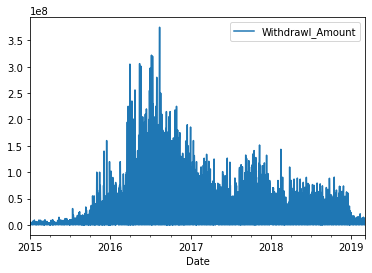

In [30]:
df1.plot()

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1525 entries, 2015-01-01 to 2019-03-05
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Withdrawl_Amount  1525 non-null   float64
dtypes: float64(1)
memory usage: 23.8 KB


In [38]:
#Scaling the Data between 0 to 1 :
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df1)

In [57]:
scaled

array([[0.        ],
       [0.01466682],
       [0.00586667],
       ...,
       [0.        ],
       [0.0128    ],
       [0.0311859 ]])

In [58]:
#Means Scaling has worked
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [59]:
len(scaled)

1525

In [60]:
#Create the model
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 1067
test: 458


In [61]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [62]:
look_back = 5
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1061, 5)
(1061,)
(452, 5)
(452,)


In [68]:
# LSTM demands the formatting of the data in (Sample, #Features, Window_Size)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(1061, 5, 1)
(452, 5, 1)


In [69]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, 
# and an output layer that makes a single value prediction. 
# The default sigmoid activation function is used for the LSTM blocks. 
# The network is trained for 100 epochs and a batch size of 1 is used.
#create and fit the LSTM network

batch_size = 1 #How many records we are pushing into the model
model = tf.keras.Sequential() #Defining Sequential Model

# 4 --> # Total #Neurons 
# (batch_size, look_back, 1) --> 1-D data we have passed, as there is only #passengers feature
# stateful=True means we are allowing the LSTM to hold the information nad forward the information to the next
model.add(LSTM(10, batch_input_shape=(batch_size, look_back, 1), stateful=True))

#Output Layer
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/200
1061/1061 - 2s - loss: 0.0243
Epoch 2/200
1061/1061 - 2s - loss: 0.0210
Epoch 3/200
1061/1061 - 2s - loss: 0.0207
Epoch 4/200
1061/1061 - 2s - loss: 0.0205
Epoch 5/200
1061/1061 - 2s - loss: 0.0204
Epoch 6/200
1061/1061 - 2s - loss: 0.0205
Epoch 7/200
1061/1061 - 2s - loss: 0.0203
Epoch 8/200
1061/1061 - 2s - loss: 0.0200
Epoch 9/200
1061/1061 - 2s - loss: 0.0201
Epoch 10/200
1061/1061 - 2s - loss: 0.0201
Epoch 11/200
1061/1061 - 2s - loss: 0.0197
Epoch 12/200
1061/1061 - 2s - loss: 0.0197
Epoch 13/200
1061/1061 - 2s - loss: 0.0197
Epoch 14/200
1061/1061 - 2s - loss: 0.0197
Epoch 15/200
1061/1061 - 2s - loss: 0.0198
Epoch 16/200
1061/1061 - 2s - loss: 0.0195
Epoch 17/200
1061/1061 - 2s - loss: 0.0194
Epoch 18/200
1061/1061 - 2s - loss: 0.0194
Epoch 19/200
1061/1061 - 2s - loss: 0.0192
Epoch 20/200
1061/1061 - 2s - loss: 0.0192
Epoch 21/200
1061/1061 - 2s - loss: 0.0193
Epoch 22/200
1061/1061 - 2s - loss: 0.0190
Epoch 23/200
1061/1061 - 2s - loss: 0.0187
Epoch 24/200
1061/10

Epoch 190/200
1061/1061 - 2s - loss: 0.0127
Epoch 191/200
1061/1061 - 2s - loss: 0.0129
Epoch 192/200
1061/1061 - 2s - loss: 0.0130
Epoch 193/200
1061/1061 - 2s - loss: 0.0127
Epoch 194/200
1061/1061 - 2s - loss: 0.0127
Epoch 195/200
1061/1061 - 2s - loss: 0.0124
Epoch 196/200
1061/1061 - 3s - loss: 0.0127
Epoch 197/200
1061/1061 - 3s - loss: 0.0127
Epoch 198/200
1061/1061 - 3s - loss: 0.0128
Epoch 199/200
1061/1061 - 3s - loss: 0.0129
Epoch 200/200
1061/1061 - 3s - loss: 0.0125


In [70]:
import math
from sklearn.metrics import mean_squared_error

#Prediction done on Training Data
trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

#Prediction done on Testing Data
testPredict = model.predict(X_test, batch_size=batch_size)

# inversing MinMaxScaler for both predicted value and actual value
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])

testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 41689791.54 RMSE
Test Score: 24250076.33 RMSE


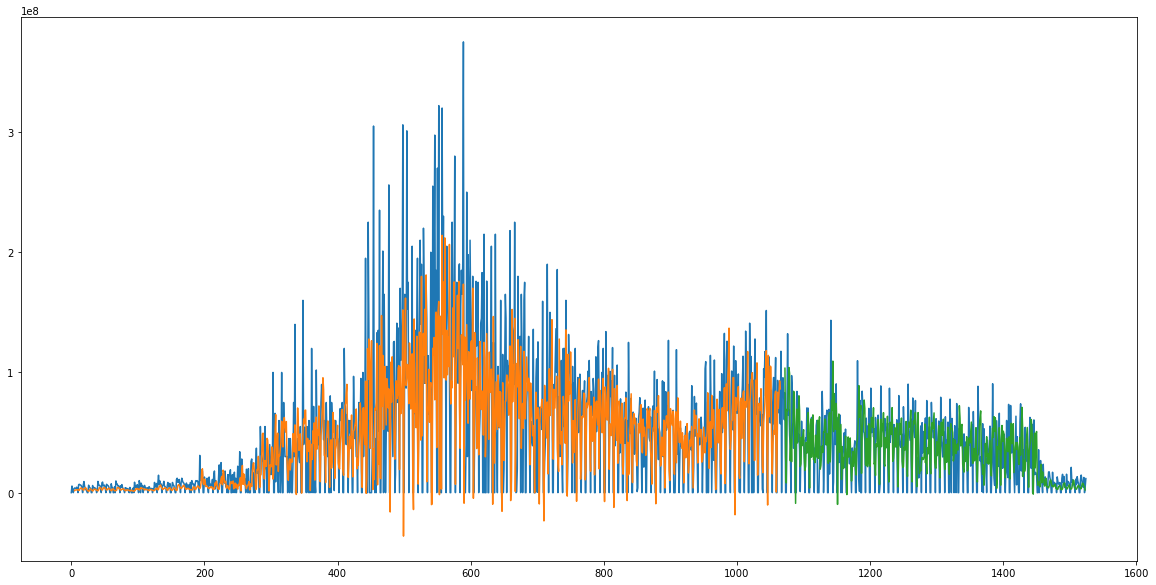

In [71]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()